# Project: Wrangling and Analyze Data

## Table of contents
1. [Data Gathering](#data-g)
2. [Assesing Data](#assess-data)
3. [Quality Issues](#qual-iss)
4. [Tidiness Issues](#tidy-iss)
5. [Cleaning Data](#clean-data)
6. [Storing Data](#store-data)
7. [Analyzing and Visualizing Data](#anv-data)


## Data Gathering <a class="anchor" id="data-g"></a>

In [1]:
#importing all needed libraries
import pandas as pd
import requests
import os
import numpy as np
import time
import tweepy
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
#getting the twitter archive into a Dataaframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#checking the DataFrame
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#downloading the tweet image prediction using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

In [5]:
#opening the image prediction file for writing
with open('image-predictions.tsv', mode = 'wb') as file:
    file.write(response.content)

In [6]:
#getting the file into a DataFrame
predictions_table = pd.read_csv('image-predictions.tsv', sep='\t')

In [7]:
#checking the DataFrame
predictions_table.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [8]:
#loading additional data via the Twitter API

API_Key = "hidden"
API_Key_Secret = "hidden"
Access_Token = "hidden"
Access_Token_Secret = "hidden"

auth = tweepy.OAuthHandler(API_Key, API_Key_Secret)
auth.set_access_token(Access_Token, Access_Token_Secret)

api = tweepy.API(auth_handler = auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True)

In [9]:
# writing JSON data to the relevant tweet_json.txt file with each 
# tweet's JSON data on its own line

Deleted_tweets = []

with open ('tweet_json.txt', 'w') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            starting_time = time.time()
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            file.write(json.dumps(tweet) + '\n')
            ending_time = time.time()
            print('ID {} , Time taken in seconds: {}'.format(tweet_id, 
                                                             ending_time-starting_time))
        except Exception as ex:
            Deleted_tweets.append(tweet_id)
            print("Error for ID: " + str(tweet_id) + str(ex))
    print('The End.')

ID 892420643555336193 , Time taken in seconds: 0.15354466438293457
ID 892177421306343426 , Time taken in seconds: 0.1627354621887207
ID 891815181378084864 , Time taken in seconds: 0.14745807647705078
ID 891689557279858688 , Time taken in seconds: 0.23622941970825195
ID 891327558926688256 , Time taken in seconds: 0.20705389976501465
ID 891087950875897856 , Time taken in seconds: 0.15102648735046387
ID 890971913173991426 , Time taken in seconds: 0.1848316192626953
ID 890729181411237888 , Time taken in seconds: 0.16129827499389648
ID 890609185150312448 , Time taken in seconds: 0.1461637020111084
ID 890240255349198849 , Time taken in seconds: 0.1558215618133545
ID 890006608113172480 , Time taken in seconds: 0.17553234100341797
ID 889880896479866881 , Time taken in seconds: 0.17817258834838867
ID 889665388333682689 , Time taken in seconds: 0.14628386497497559
ID 889638837579907072 , Time taken in seconds: 0.1527857780456543
ID 889531135344209921 , Time taken in seconds: 0.1890096664428711
I

In [10]:
empty_list = []

In [11]:
#loading the needed columns of the tweet_json_txt to a DataFrame
with open ('tweet_json.txt', 'r') as file:
    for line in file.readlines():
        tweet_json_file = json.loads(line)
        tweet_id = tweet_json_file['id']
        retweet_count = tweet_json_file["retweet_count"]
        favorite_count = tweet_json_file["favorite_count"]
        created_at = tweet_json_file["created_at"]
        empty_dict = {'id': tweet_id, "retweet_count": retweet_count,
                     "favorite_count": favorite_count, "created_at": created_at}
        empty_list.append(empty_dict)

In [12]:
empty_list

[{'id': 892420643555336193,
  'retweet_count': 6979,
  'favorite_count': 33727,
  'created_at': 'Tue Aug 01 16:23:56 +0000 2017'},
 {'id': 892177421306343426,
  'retweet_count': 5281,
  'favorite_count': 29257,
  'created_at': 'Tue Aug 01 00:17:27 +0000 2017'},
 {'id': 891815181378084864,
  'retweet_count': 3466,
  'favorite_count': 21991,
  'created_at': 'Mon Jul 31 00:18:03 +0000 2017'},
 {'id': 891689557279858688,
  'retweet_count': 7201,
  'favorite_count': 36823,
  'created_at': 'Sun Jul 30 15:58:51 +0000 2017'},
 {'id': 891327558926688256,
  'retweet_count': 7723,
  'favorite_count': 35217,
  'created_at': 'Sat Jul 29 16:00:24 +0000 2017'},
 {'id': 891087950875897856,
  'retweet_count': 2590,
  'favorite_count': 17760,
  'created_at': 'Sat Jul 29 00:08:17 +0000 2017'},
 {'id': 890971913173991426,
  'retweet_count': 1649,
  'favorite_count': 10341,
  'created_at': 'Fri Jul 28 16:27:12 +0000 2017'},
 {'id': 890729181411237888,
  'retweet_count': 15698,
  'favorite_count': 56705,
  

In [13]:
#getting the data into a DataFrame
tweet_json_data = pd.DataFrame(empty_list)
tweet_json_data.head()

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,33727,892420643555336193,6979
1,Tue Aug 01 00:17:27 +0000 2017,29257,892177421306343426,5281
2,Mon Jul 31 00:18:03 +0000 2017,21991,891815181378084864,3466
3,Sun Jul 30 15:58:51 +0000 2017,36823,891689557279858688,7201
4,Sat Jul 29 16:00:24 +0000 2017,35217,891327558926688256,7723


In [14]:
tweet_json_data.tail()

,created_at,favorite_count,id,retweet_count
2316,Mon Nov 16 00:24:50 +0000 2015,88,666049248165822465,36
2317,Mon Nov 16 00:04:52 +0000 2015,246,666044226329800704,115
2318,Sun Nov 15 23:21:54 +0000 2015,100,666033412701032449,36
2319,Sun Nov 15 23:05:30 +0000 2015,112,666029285002620928,39
2320,Sun Nov 15 22:32:08 +0000 2015,2284,666020888022790149,421


In [15]:
tweet_json_data

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,33727,892420643555336193,6979
1,Tue Aug 01 00:17:27 +0000 2017,29257,892177421306343426,5281
2,Mon Jul 31 00:18:03 +0000 2017,21991,891815181378084864,3466
3,Sun Jul 30 15:58:51 +0000 2017,36823,891689557279858688,7201
4,Sat Jul 29 16:00:24 +0000 2017,35217,891327558926688256,7723
5,Sat Jul 29 00:08:17 +0000 2017,17760,891087950875897856,2590
6,Fri Jul 28 16:27:12 +0000 2017,10341,890971913173991426,1649
7,Fri Jul 28 00:22:40 +0000 2017,56705,890729181411237888,15698
8,Thu Jul 27 16:25:51 +0000 2017,24459,890609185150312448,3605
9,Wed Jul 26 15:59:51 +0000 2017,27877,890240255349198849,6083


## Assessing Data
<a class="anchor" id="assess-data"></a>

### Visual Assessment

In [16]:
#visually assessing the twitter archive
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [17]:
#visually assessing the image predictions DataFrame
predictions_table

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [18]:
#visually assessing the twitter json data gotten from the API
tweet_json_data

,created_at,favorite_count,id,retweet_count
0,Tue Aug 01 16:23:56 +0000 2017,33727,892420643555336193,6979
1,Tue Aug 01 00:17:27 +0000 2017,29257,892177421306343426,5281
2,Mon Jul 31 00:18:03 +0000 2017,21991,891815181378084864,3466
3,Sun Jul 30 15:58:51 +0000 2017,36823,891689557279858688,7201
4,Sat Jul 29 16:00:24 +0000 2017,35217,891327558926688256,7723
5,Sat Jul 29 00:08:17 +0000 2017,17760,891087950875897856,2590
6,Fri Jul 28 16:27:12 +0000 2017,10341,890971913173991426,1649
7,Fri Jul 28 00:22:40 +0000 2017,56705,890729181411237888,15698
8,Thu Jul 27 16:25:51 +0000 2017,24459,890609185150312448,3605
9,Wed Jul 26 15:59:51 +0000 2017,27877,890240255349198849,6083


### Programmatic Assessment

#### Twitter Archive

In [19]:
#checking the number of retweets
twitter_archive[twitter_archive['retweeted_status_id'].notnull()].shape

(181, 17)

In [20]:
#checking the number of replies
twitter_archive[twitter_archive['in_reply_to_user_id'].notnull()].shape

(78, 17)

In [21]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [22]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [23]:
twitter_archive.sample(7)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1647,683828599284170753,NaN,NaN,2016-01-04 01:53:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Breathtaking pupper here. Should be on the cov...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683828599...,12,10,None,None,None,pupper,None
1717,680191257256136705,NaN,NaN,2015-12-25 01:00:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a sleepy Christmas pupper 11/10 https:/...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680191257...,11,10,None,None,None,pupper,None
661,791026214425268224,NaN,NaN,2016-10-25 21:18:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Alfie. He's touching a ...,7.638376e+17,4.196984e+09,2016-08-11 20:40:41 +0000,https://twitter.com/dog_rates/status/763837565...,11,10,Alfie,None,None,None,None
1698,681193455364796417,NaN,NaN,2015-12-27 19:22:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Aspen. He's astronomically fluffy. I w...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681193455...,11,10,Aspen,None,None,None,None
1061,741303864243200000,NaN,NaN,2016-06-10 16:19:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Theodore. He just saw an adult wearing...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/741303864...,12,10,Theodore,None,None,None,None
151,862831371563274240,NaN,NaN,2017-05-12 00:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zooey. She's the world's biggest fan o...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/862831371...,13,10,Zooey,None,None,None,None
2117,670421925039075328,NaN,NaN,2015-11-28 02:00:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Herb. 12/10 https://t.co/tLRyYvCci3,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670421925...,12,10,Herb,None,None,None,None


In [24]:
#checking for empty entry of names
twitter_archive[twitter_archive['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [25]:
#checking empty entries for expanded URLs
twitter_archive[twitter_archive['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [26]:
#checking the number of empty entries for expanded URLs
twitter_archive[twitter_archive['expanded_urls'].isnull()].shape

(59, 17)

In [27]:
#checking the number of different 'name' entries
twitter_archive.name.value_counts()

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Daisy           7
an              7
Toby            7
Buddy           7
Bailey          7
Milo            6
Jack            6
Scout           6
Koda            6
Leo             6
Dave            6
Jax             6
Rusty           6
Stanley         6
Bella           6
Oscar           6
Alfie           5
             ... 
Buddah          1
Burt            1
Jimbo           1
Pilot           1
Darrel          1
Dudley          1
Finnegus        1
Ralf            1
Mike            1
Coleman         1
Dex             1
Bobbay          1
Blu             1
Mairi           1
Alf             1
Stormy          1
Marq            1
Bones           1
by              1
Arlo            1
incredibly      1
Bauer           1
Wesley          1
Duchess         1
Frönq     

In [28]:
#checking for duplicated rows
twitter_archive.duplicated().sum()

0

#### Image Prediction Table

In [29]:
predictions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [30]:
predictions_table.sample(6)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1546,792394556390137856,https://pbs.twimg.com/media/Cv8moW9W8AIHOxR.jpg,2,cocker_spaniel,0.746387,True,Irish_setter,0.091615,True,miniature_poodle,0.061078,True
256,670764103623966721,https://pbs.twimg.com/media/CU8IY0pWIAA2AJ-.jpg,1,Norfolk_terrier,0.172850,True,golden_retriever,0.072702,True,television,0.037494,False
724,686034024800862208,https://pbs.twimg.com/media/CYVIToGWQAAEZ_y.jpg,1,Great_Dane,0.236920,True,Irish_wolfhound,0.117608,True,Greater_Swiss_Mountain_dog,0.103900,True
624,680609293079592961,https://pbs.twimg.com/media/CXICiB9UwAE1sKY.jpg,1,French_bulldog,0.700764,True,Chihuahua,0.072390,True,American_Staffordshire_terrier,0.039619,True
574,678446151570427904,https://pbs.twimg.com/media/CWpTLOYWsAEDhcU.jpg,1,Staffordshire_bullterrier,0.284492,True,Rottweiler,0.189434,True,American_Staffordshire_terrier,0.189430,True
578,678755239630127104,https://pbs.twimg.com/media/CWtsSQAUkAAnWws.jpg,1,malamute,0.606654,True,Border_collie,0.193831,True,collie,0.048378,True


In [31]:
predictions_table.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [32]:
#checking for duplicated rows
predictions_table.duplicated().sum()

0

In [33]:
#checking for duplicated 'jpg_url' entries
predictions_table['jpg_url'].duplicated().sum()

66

In [34]:
#checking the duplicated 'jpg_url' entries
predictions_table[predictions_table['jpg_url'].duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [35]:
#checking the number of duplicated tweet IDs
predictions_table['tweet_id'].duplicated().sum()

0

In [36]:
#checking for null values in 'img_num' column
predictions_table[predictions_table['img_num'].isnull()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


#### Twitter API Data

In [37]:
tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
created_at        2321 non-null object
favorite_count    2321 non-null int64
id                2321 non-null int64
retweet_count     2321 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.6+ KB


In [38]:
tweet_json_data.describe()

,favorite_count,id,retweet_count
count,2321.000000,2.321000e+03,2321.000000
mean,7032.242568,7.417310e+17,2461.822490
std,10942.090832,6.825763e+16,4173.790622
min,0.000000,6.660209e+17,1.000000
25%,1218.000000,6.780211e+17,492.000000
50%,3041.000000,7.177900e+17,1144.000000
75%,8563.000000,7.986731e+17,2842.000000
max,144414.000000,8.924206e+17,70438.000000


In [39]:
tweet_json_data.sample(9)

,created_at,favorite_count,id,retweet_count
724,Fri Sep 23 17:50:56 +0000 2016,8236,779377524342161408,2874
1740,Sat Dec 19 01:16:45 +0000 2015,12346,678021115718029313,5612
630,Fri Oct 28 01:58:16 +0000 2016,0,791821351946420224,19644
77,Wed Jun 21 19:36:23 +0000 2017,0,877611172832227328,70
373,Mon Jan 30 23:05:46 +0000 2017,4591,826204788643753985,855
1617,Sun Jan 03 04:01:13 +0000 2016,2930,683498322573824003,872
1435,Mon Feb 01 15:39:48 +0000 2016,2705,694183373896572928,842
1340,Tue Feb 23 02:12:47 +0000 2016,3536,701952816642965504,928
1043,Mon Jun 06 01:02:55 +0000 2016,3493,739623569819336705,1236


### Quality issues
<a class="anchor" id="qual-iss"></a>

#### Twitter Archive Dataset
1. 'Expanded URL' column has missing values

2. Not all tweets are original (some are retweets and replies)

3. Not all dogs' correct names were added

4. Incorrect data type for tweet ID

5. There are some incorrect figures for 'numerator' and 'denominator' ratings

6. Timestamp column data type is object instead of datetime

#### Image Predictions Dataset
7. Incorrect data type for tweet ID

8. There are some duplicated 'jpg URL' entries

9. Some names start with lower case letters

#### Twitter API Data
10. 'Create date' data type is object instead of datetime

11. Incorrect data type for tweet ID

### Tidiness issues
1. The columns of different dog stages (doggo, floofer, pupper and puppo) should be one column

2. All dataframes should be merged

## Cleaning Data
<a class="anchor" id="clean-data"></a>

In [40]:
# Making copies of original pieces of data
clean_twitter_archive = twitter_archive.copy()
clean_predictions_table = predictions_table.copy()
clean_tweet_json_data = tweet_json_data.copy()

### Quality Issues

#### Twitter Archive Dataset

### Issue #1: 'Expanded URL' column has missing values

#### Define: Drop rows where expanded_urls have missing values

#### Code

In [41]:
#Dropping rows where expanded_urls have missing values
clean_twitter_archive.dropna(subset=['expanded_urls'], inplace=True)

#### Test

In [42]:
clean_twitter_archive[twitter_archive['expanded_urls'].isnull()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #2: Not all tweets are original (some are retweets and replies)

#### Define: Drop rows with retweets and replies

#### Code

In [43]:
#Dropping rows with retweets
remove_retweet = clean_twitter_archive[pd.notnull(twitter_archive['retweeted_status_id'])].index

clean_twitter_archive.drop(index= remove_retweet, inplace= True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [44]:
#Dropping rows with replies
remove_reply = clean_twitter_archive[pd.notnull(twitter_archive['in_reply_to_user_id'])].index

clean_twitter_archive.drop(index= remove_reply, inplace= True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


#### Test

In [45]:
clean_twitter_archive[twitter_archive['retweeted_status_id'].notnull()].shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(0, 17)

In [46]:
clean_twitter_archive[twitter_archive['retweeted_status_id'].notnull()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [47]:
clean_twitter_archive[twitter_archive['in_reply_to_user_id'].notnull()].shape

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


(0, 17)

In [48]:
clean_twitter_archive[twitter_archive['in_reply_to_user_id'].notnull()]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #3: Not all dogs' correct names were added

#### Define: Fix the names of the Dogs

#### Code

In [49]:
#Using regex to find name entries that start with capital letters
clean_twitter_archive['name'] = clean_twitter_archive.name.str.extract('\\b([A-Z]\\S*)\\b')

In [50]:
#Dropping entries that have 'None' in the name column
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.name != 'None']

In [51]:
#Dropping null values in the name column
clean_twitter_archive.dropna(subset=['name'], inplace=True)

#### Test

In [52]:
clean_twitter_archive.name.value_counts()

Charlie    11
Lucy       11
Cooper     10
Oliver     10
Tucker      9
Penny       9
Sadie       8
Winston     8
Lola        8
Daisy       7
Toby        7
Jax         6
Oscar       6
Bo          6
Bailey      6
Stanley     6
Bella       6
Koda        6
Dave        5
Bentley     5
Milo        5
Leo         5
Chester     5
Buddy       5
Scout       5
Rusty       5
Louis       5
Reggie      4
Dexter      4
Alfie       4
           ..
Toffee      1
Amélie      1
Brownie     1
Rilo        1
Duchess     1
Bauer       1
Stu         1
Mike        1
Chubbs      1
Fillup      1
Ed          1
Craig       1
Claude      1
Ralphus     1
Chef        1
Canela      1
Seamus      1
Leela       1
Timmy       1
Kulet       1
Coleman     1
Dex         1
Bobbay      1
Blu         1
Mairi       1
Alf         1
Stormy      1
Marq        1
Bones       1
Carbon      1
Name: name, Length: 929, dtype: int64

In [53]:
clean_twitter_archive[clean_twitter_archive['name'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Issue #4: Incorrect data type for tweet ID

#### Define: Change tweet ID data type to object

#### Code

In [54]:
#Changing tweet ID data type to object
clean_twitter_archive.tweet_id = clean_twitter_archive.tweet_id.astype(str)

#### Test

In [55]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1390 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1390 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1390 non-null object
source                        1390 non-null object
text                          1390 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1390 non-null object
rating_numerator              1390 non-null int64
rating_denominator            1390 non-null int64
name                          1390 non-null object
doggo                         1390 non-null object
floofer                       1390 non-null object
pupper                        1390 non-null object
puppo                         1390 non-null object
dtypes: float64(4), int64(2), object(11

### Issue #5: There are some incorrect figures for 'numerator' and 'denominator' ratings

#### Define: Fix the ratings

#### Code

In [56]:
#searching for the denominators and numerators of the scores and
#adding them to the right column

#adding string match for the right placement of ratings
clean_twitter_archive_arranged = clean_twitter_archive.text.str.contains("\d+/10")

#maintaining the right placement throughout
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive_arranged].copy()

#extracting numerators and denominators
clean_twitter_archive_extract = clean_twitter_archive.text.str.extract("(\d+/10)", expand=False).copy()

clean_twitter_archive["rating_numerator"] = clean_twitter_archive_extract.apply(lambda x: int(str(x)[:-3]))
clean_twitter_archive["rating_denominator"] = 10

#### Test

In [57]:
clean_twitter_archive[clean_twitter_archive['rating_denominator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [58]:
clean_twitter_archive[clean_twitter_archive['rating_numerator'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [59]:
clean_twitter_archive['rating_denominator'].describe()

count    1389.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [60]:
clean_twitter_archive['rating_numerator'].describe()

count    1389.000000
mean       12.058315
std        47.435200
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### Issue #6: Timestamp column data type is object instead of datetime

#### Define: Change the timestamp data type to datetime

#### Code

In [61]:
#Changing the timestamp data type to datetime
clean_twitter_archive['timestamp'] = pd.to_datetime(clean_twitter_archive['timestamp'])

#### Test

In [62]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1389 entries, 0 to 2325
Data columns (total 17 columns):
tweet_id                      1389 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1389 non-null datetime64[ns]
source                        1389 non-null object
text                          1389 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1389 non-null object
rating_numerator              1389 non-null int64
rating_denominator            1389 non-null int64
name                          1389 non-null object
doggo                         1389 non-null object
floofer                       1389 non-null object
pupper                        1389 non-null object
puppo                         1389 non-null object
dtypes: datetime64[ns](1), floa

#### Image Predictions Dataset

### Issue #7: Incorrect data type for tweet ID

#### Define: Change tweet ID data type to object

#### Code

In [63]:
#Changing tweet ID data type to object
clean_predictions_table.tweet_id = clean_predictions_table.tweet_id.astype(str)

#### Test

In [64]:
clean_predictions_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Issue #8: There are some duplicated 'jpg URL' entries

#### Define: Drop duplicate 'jpg URL' entries

#### Code

In [65]:
#Dropping duplicate 'jpg URL' entries
clean_predictions_table.drop_duplicates(subset= 'jpg_url', inplace = True)

#### Test

In [66]:
clean_predictions_table['jpg_url'].duplicated().sum()

0

### Issue #9: Some names start with lowercase letters

#### Define: Change the names to start with capital letters

#### Code

In [67]:
#Changing the names to start with capital letters
clean_predictions_table.p1 = clean_predictions_table.p1.str.title()
clean_predictions_table.p2 = clean_predictions_table.p2.str.title()
clean_predictions_table.p3 = clean_predictions_table.p3.str.title()

#### Test

In [68]:
clean_predictions_table.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1381,765371061932261376,https://pbs.twimg.com/media/Cp8k6oRWcAUL78U.jpg,2,Golden_Retriever,0.829456,True,Labrador_Retriever,0.089371,True,Kuvasz,0.017028,True
1313,754747087846248448,https://pbs.twimg.com/media/CnlmeL3WgAA4c84.jpg,1,Rotisserie,0.471493,False,Cash_Machine,0.250837,False,Sliding_Door,0.117872,False
920,701952816642965504,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,Toy_Poodle,0.331707,True,Miniature_Poodle,0.272485,True,Standard_Poodle,0.169415,True
1252,747963614829678593,https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg,1,Kelpie,0.307672,True,Irish_Terrier,0.197486,True,Dingo,0.105475,False
1565,793845145112371200,https://pbs.twimg.com/media/CwRN8H6WgAASe4X.jpg,1,Old_English_Sheepdog,0.765277,True,Bedlington_Terrier,0.112753,True,Kerry_Blue_Terrier,0.047662,True
1774,828046555563323392,https://pbs.twimg.com/media/C33P8PrUcAMiQQs.jpg,3,Patio,0.272972,False,Window_Screen,0.131295,False,Boathouse,0.046393,False
1409,770414278348247044,https://pbs.twimg.com/media/CrEPsfWXEAAKvem.jpg,1,Maillot,0.580528,False,Maillot,0.081449,False,Golden_Retriever,0.053570,True
925,702539513671897089,https://pbs.twimg.com/media/Cb_r8qTUsAASgdF.jpg,3,Pomeranian,0.714367,True,Shih-Tzu,0.040574,True,Silky_Terrier,0.032511,True
1770,827600520311402496,https://pbs.twimg.com/media/C3w6RYbWQAAEQ25.jpg,1,Pembroke,0.325638,True,Golden_Retriever,0.317235,True,Labrador_Retriever,0.116087,True
328,672068090318987265,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1,Pug,0.863385,True,Shopping_Cart,0.125746,False,Border_Terrier,0.002972,True


#### Twitter API Data

### Issue #10: 'Create date' data type is object instead of datetime

#### Define: Change 'create date' data type to datetime

#### Code

In [69]:
#Changing 'create date' data type to datetime
clean_tweet_json_data['created_at'] = pd.to_datetime(clean_tweet_json_data['created_at'])

#### Test

In [70]:
clean_tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
created_at        2321 non-null datetime64[ns]
favorite_count    2321 non-null int64
id                2321 non-null int64
retweet_count     2321 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 72.6 KB


### Issue #11: Incorrect data type for tweet ID

#### Define: Change tweet ID data type to object

#### Code

In [71]:
#Changing tweet ID data type to object
clean_tweet_json_data.id = clean_tweet_json_data.id.astype(str)

#### Test

In [72]:
clean_tweet_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2321 entries, 0 to 2320
Data columns (total 4 columns):
created_at        2321 non-null datetime64[ns]
favorite_count    2321 non-null int64
id                2321 non-null object
retweet_count     2321 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 72.6+ KB


### Tidiness Issues
<a class="anchor" id="tidy-iss"></a>

### Issue #12: There are different columns for dog stages (doggo, floofer, pupper and puppo)

#### Define: The different columns for dog stages should be collapsed into one

#### Code

In [73]:
#creating the column for dogs' stages
clean_twitter_archive['dog_stage'] = clean_twitter_archive.text.str.extract('(doggo | floofer | pupper | puppo)', expand = True)

#stripping the spaces extracted with the text
clean_twitter_archive.dog_stage = clean_twitter_archive.dog_stage.str.strip()

#dropping old columns
clean_twitter_archive = clean_twitter_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#changing dog_stage data type to category
clean_twitter_archive.dog_stage = clean_twitter_archive.dog_stage.astype('category')

#### Test

In [74]:
clean_twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo
10,890006608113172480,NaN,NaN,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN
11,889880896479866881,NaN,NaN,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN


In [75]:
clean_twitter_archive['dog_stage'].value_counts()

pupper     77
doggo      24
puppo      19
floofer     2
Name: dog_stage, dtype: int64

### Issue #13: The dataframes are not merged

#### Define: Merge the dataframes

#### Code

In [76]:
#changing the column name in tweet json data
clean_tweet_json_data = clean_tweet_json_data.rename(columns = {'id':'tweet_id'})

In [77]:
#merging the twitter archive and image prediction tables
merged_archive = pd.merge(clean_twitter_archive, clean_predictions_table, on='tweet_id')
#merging clean_tweet_json_data table with the merged_archive data frame
merged_archive = pd.merge(merged_archive, clean_tweet_json_data, on='tweet_id')

In [78]:
merged_archive = merged_archive.drop_duplicates()

In [79]:
#dropping unnecessary columns
merged_archive.drop(['in_reply_to_status_id', 
                    'in_reply_to_user_id', 
                    'retweeted_status_id', 
                    'retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)

#### Test

In [80]:
merged_archive

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,created_at,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,False,Bagel,0.085851,False,Banana,0.076110,False,2017-08-01 16:23:56,33727,6979
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,True,Pekinese,0.090647,True,Papillon,0.068957,True,2017-08-01 00:17:27,29257,5281
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,True,Malamute,0.078253,True,Kelpie,0.031379,True,2017-07-31 00:18:03,21991,3466
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False,2017-07-30 15:58:51,36823,7201
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True,2017-07-29 16:00:24,35217,7723
5,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False,2017-07-28 16:27:12,10341,1649
6,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,NaN,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True,2017-07-27 16:25:51,24459,3605
7,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,2017-07-26 15:59:51,27877,6083
8,890006608113172480,2017-07-26 00:31:25,"<a href=""http://twitter.com/download/iphone"" r...",This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,...,True,Pomeranian,0.013884,True,Chow,0.008167,True,2017-07-26 00:31:25,26975,6121
9,889880896479866881,2017-07-25 16:11:53,"<a href=""http://twitter.com/download/iphone"" r...",This is Bruno. He is a service shark. Only get...,https://twitter.com/dog_rates/status/889880896...,13,10,Bruno,NaN,https://pbs.twimg.com/media/DFl99B1WsAITKsg.jpg,...,True,Labrador_Retriever,0.151317,True,Muzzle,0.082981,False,2017-07-25 16:11:53,24507,4145


In [81]:
merged_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1336
Data columns (total 23 columns):
tweet_id              1337 non-null object
timestamp             1337 non-null datetime64[ns]
source                1337 non-null object
text                  1337 non-null object
expanded_urls         1337 non-null object
rating_numerator      1337 non-null int64
rating_denominator    1337 non-null int64
name                  1337 non-null object
dog_stage             115 non-null category
jpg_url               1337 non-null object
img_num               1337 non-null int64
p1                    1337 non-null object
p1_conf               1337 non-null float64
p1_dog                1337 non-null bool
p2                    1337 non-null object
p2_conf               1337 non-null float64
p2_dog                1337 non-null bool
p3                    1337 non-null object
p3_conf               1337 non-null float64
p3_dog                1337 non-null bool
created_at            1337 non

## Storing Data
<a class="anchor" id="store-data"></a>

In [82]:
merged_archive.to_csv("twitter_archive_master.csv", index= False)

## Analyzing and Visualizing Data
<a class="anchor" id="anv-data"></a>
In this section, I'm analyzing and visualizing the wrangled data.

### Questions to get Insights:


1. What dog names are most common? Charlie, Oliver, etc.

2. What tweets have the highest average favorite count? 807106840509214720, etc

3. What dog stage has the highest average favorite count? Floofer

4. What is the most common dog stage? Pupper

5. Is there any correlation between favorite count and number of retweets? Yes, positive corellation




1. What dog names are most common?

In [83]:
merged_archive['name'].value_counts().nlargest(6)

Charlie    10
Oliver     10
Cooper     10
Lucy        9
Tucker      9
Penny       9
Name: name, dtype: int64

2. What tweets have the highest average favorite count?

In [84]:
merged_archive.groupby('tweet_id')['favorite_count'].mean().nlargest(3).astype(int)

tweet_id
807106840509214720    111348
866450705531457537    108600
879415818425184262     92613
Name: favorite_count, dtype: int64

3. What dog stage has the highest average favorite count?

In [85]:
merged_archive.groupby('dog_stage')['favorite_count'].mean().sort_values(ascending=False).astype(int)

dog_stage
floofer    15242
doggo      13213
puppo      11219
pupper      6343
Name: favorite_count, dtype: int64

### Visualization

4. What is the most common dog stage?

In [86]:
merged_archive['dog_stage'].value_counts()

pupper     75
doggo      21
puppo      17
floofer     2
Name: dog_stage, dtype: int64

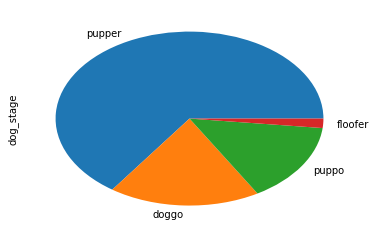

In [87]:
merged_archive['dog_stage'].value_counts().plot.pie();

5. Is there any correlation between favorite count and number of retweets?

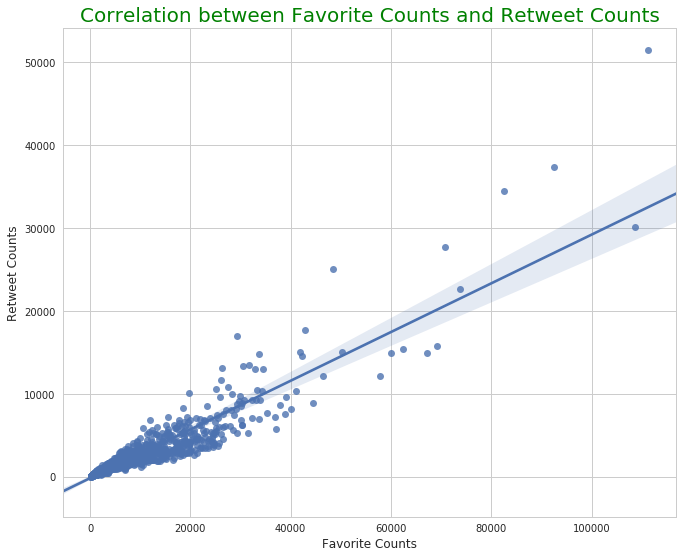

In [88]:
sns.set(rc={'figure.figsize':(11,9)}, style="whitegrid")
sns.regplot(x='favorite_count', y='retweet_count', data=merged_archive)

plt.title("Correlation between Favorite Counts and Retweet Counts",color="g", size=20)
plt.ylabel("Retweet Counts", size=12)
plt.xlabel("Favorite Counts", size=12);
